### Create Binary Search Tree

In [480]:
class BST():
    # Time: O(1)
    # Space: O(1)
    def __init__(self, value = None):
        self.data = value
        self.leftChild = None
        self.rightChild = None

In [481]:
newBST = BST(90)

### Insert a Node to Binary Search Tree

In [482]:
# Time: O(log(n))
# Space: O(log(n))          # Because we use stack memory (Recursion)
def InsertNodeBST(rootNode, data):
    if rootNode.data == None:
        rootNode.data = data
    elif rootNode.data >= data:
        if rootNode.leftChild is None:
            rootNode.leftChild = BST(data)
        else:
            InsertNodeBST(rootNode.leftChild, data)
    else:
        if rootNode.rightChild is None:
            rootNode.rightChild = BST(data)
        else:
            InsertNodeBST(rootNode.rightChild, data)
    return "The node has been successfully inserted"

In [483]:
newBST = BST(90)
InsertNodeBST(newBST, 30)
print(newBST.data, newBST.leftChild.data)

90 30


In [484]:
InsertNodeBST(newBST, 100)
print(newBST.data, newBST.leftChild.data, newBST.rightChild.data)

90 30 100


### Traversal of Binary Search Tree

##### PreOrder

In [485]:
# Root Node => Left Subtree => Right Subtree
# Time: O(n)
# Space: O(1)
def PreOrderBST(rootNode):
    if rootNode is None:
        return
    print(rootNode.data)
    PreOrderBST(rootNode.leftChild)
    PreOrderBST(rootNode.rightChild)

In [486]:
PreOrderBST(newBST)

90
30
100


##### InOrder

In [487]:
# Left Subtree => Root Node => Right Subtree
# Time: O(n)
# Space: O(1)
def InOrderBST(rootNode):
    if rootNode is None:
        return
    InOrderBST(rootNode.leftChild)
    print(rootNode.data)
    InOrderBST(rootNode.rightChild)

In [488]:
InOrderBST(newBST)

30
90
100


##### PostOrder

In [489]:
# Left Subtree => Right Subtree => Root Node 
# Time: O(n)
# Space: O(1)
def PostOrderBST(rootNode):
    if rootNode is None:
        return
    PostOrderBST(rootNode.leftChild)
    PostOrderBST(rootNode.rightChild)
    print(rootNode.data)

In [490]:
PostOrderBST(newBST)

30
100
90


##### LevelOrder

In [491]:
# In this circumstance, we use two data structure is queue and tree
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

    def __str__(self):
        return str(self.value)

class SinglyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def __iter__(self):
        curNode = self.head
        while curNode:
            yield curNode
            curNode = curNode.next

class Queue:
    def __init__(self):
        self.store = SinglyLinkedList()

    def __str__(self):
        values = [str(x.value) for x in self.store]
        return " ".join(values)

    def IsEmpty(self):
        if self.store.head == None:
            return True
        else:
            return False

    def EnQueue(self, value):
        newNode = Node(value)
        if self.store.head == None:
            self.store.head = newNode
            self.store.tail = newNode
        else:
            self.store.tail.next = newNode
            self.store.tail = newNode

    def DeQueue(self):
        if self.IsEmpty():
            return "The Queue is empty."
        else:
            tempNode = self.store.head
            if self.store.head == self.store.tail:
                self.store.head = None
                self.store.tail = None
            else:
                self.store.head = self.store.head.next
            return tempNode

    def Peak(self):
        if self.IsEmpty():
            return "The Queue is empty."
        else:
            return self.store.head.value

    def Delete(self):
        self.store.head = None
        self.store.tail = None

In [492]:
# Time: O(n)
# Space: O(n)
def LevelOrderBST(rootNode):
    if rootNode is None:
        return "Tree is empty"
    customQueue = Queue()
    customQueue.EnQueue(rootNode)
    while not customQueue.IsEmpty():
        node = customQueue.DeQueue()
        print(node.value.data)
        if node.value.leftChild != None:
            customQueue.EnQueue(node.value.leftChild)
        if node.value.rightChild != None:
            customQueue.EnQueue(node.value.rightChild)

In [493]:
LevelOrderBST(newBST)

90
30
100


### Search in Binary Search Tree

In [494]:
# Time: O(log(n))
# Space: O(log(n))
def SearchBST(rootNode: BST, value):
    if rootNode == None:
        print("Cant's found value {} in BST".format(value))
        return
    if rootNode.data == value:
        print("Found value {} in BST".format(rootNode.data))
        return
    elif value < rootNode.data:
        SearchBST(rootNode.leftChild, value)
    else:
        SearchBST(rootNode.rightChild, value)

In [495]:
# Other method
def SearchBST_Other(rootNode: BST, value):
    if rootNode.data == value:
        return "Found"
    elif value < rootNode.data:
        if rootNode.leftChild.data == value:
            return "Found"
        else:
            SearchBST_Other(rootNode.leftChild, value)
    else:
        if rootNode.rightChild.data == value:
            return "Found"
        else:
            SearchBST_Other(rootNode.rightChild, value)

In [496]:
LevelOrderBST(newBST)

90
30
100


In [497]:
print(SearchBST(newBST, 60))

Cant's found value 60 in BST
None


In [498]:
SearchBST_Other(newBST, 30)

'Found'

### Delete Node in Binary Search Tree

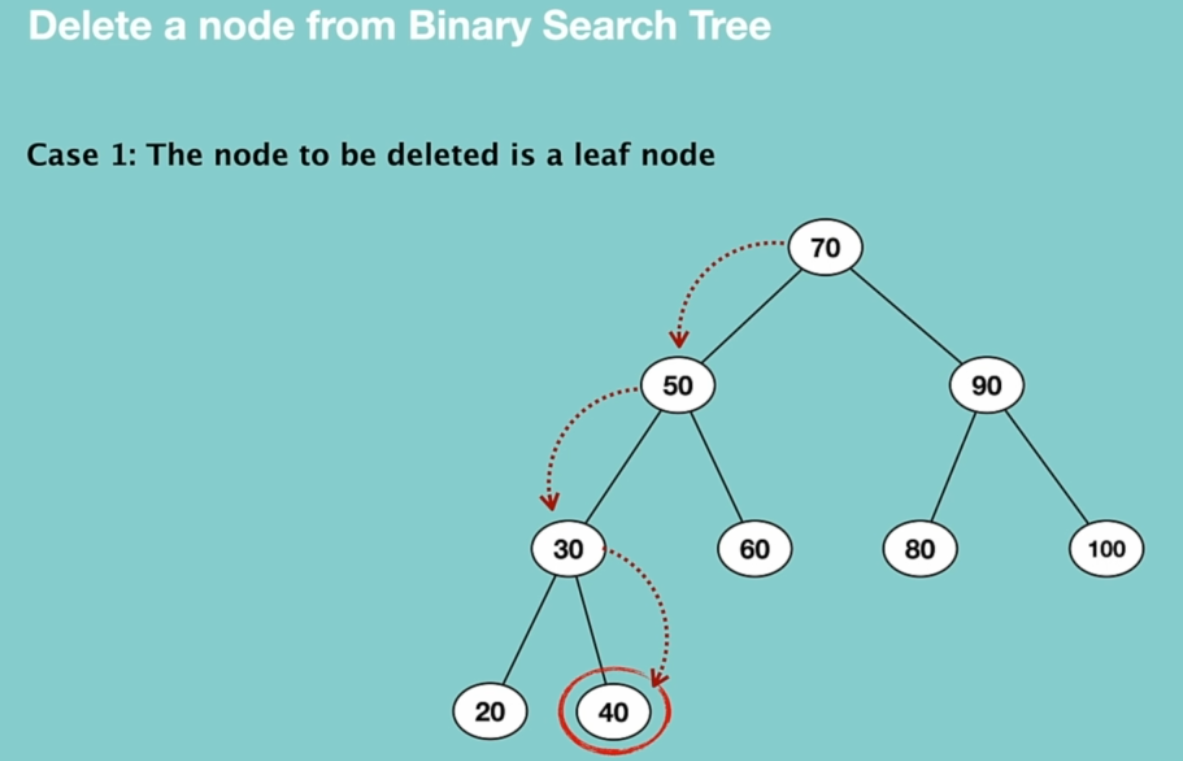

In [499]:
from IPython.display import Image
Image(filename="case1.PNG")

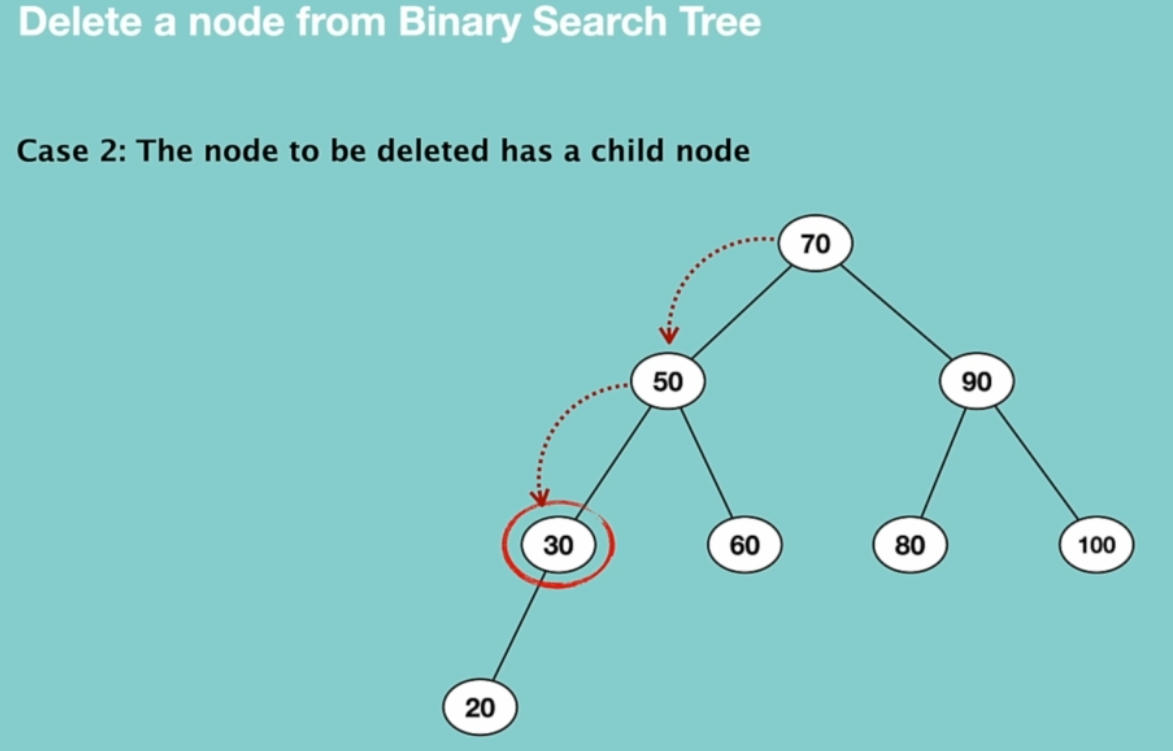

In [500]:
from IPython.display import Image
Image(filename="case2.PNG")

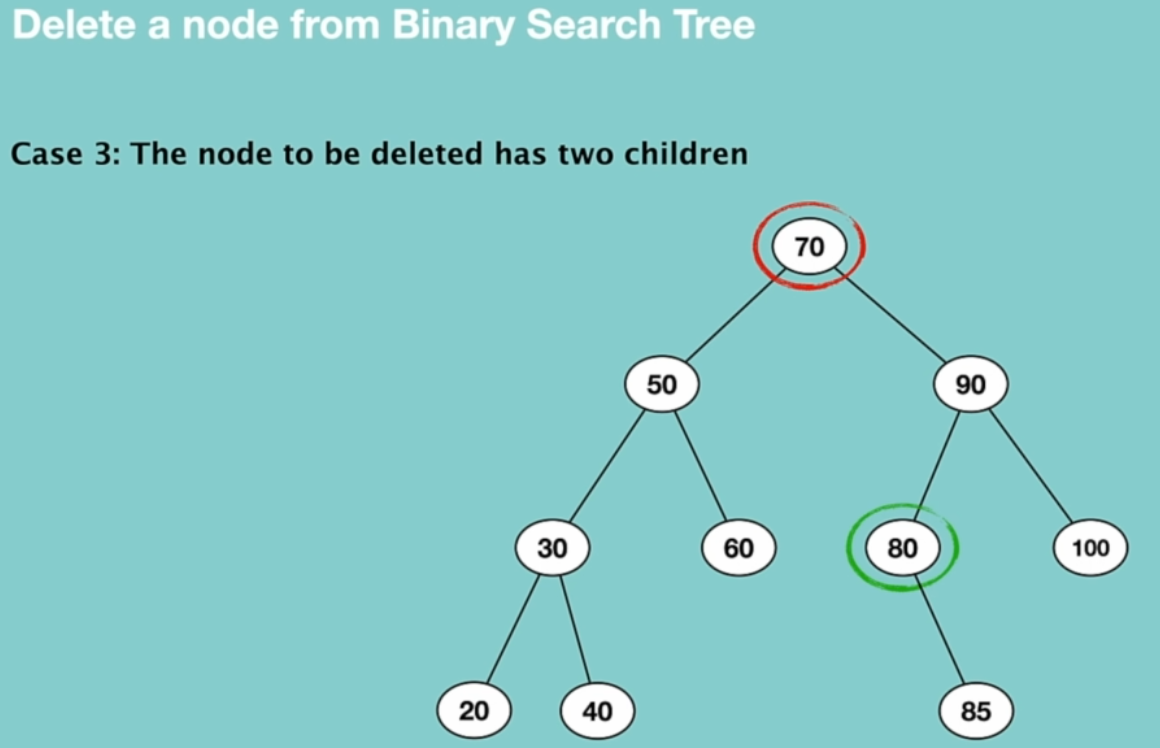

In [501]:
from IPython.display import Image
Image(filename="case3.PNG")

In [502]:
def minValueNode(rootNode):
    current = rootNode
    while current.leftChild is not None:
        current = current.leftChild
    return current

In [503]:
# Time: O(log(n))
# Space: O(log(n))
def DeleteNode(rootNode: BST, value):
    if rootNode is None:
        return rootNode
    if value < rootNode.data:
        rootNode.leftChild = DeleteNode(rootNode.leftChild, value)
    elif value > rootNode.data:
        rootNode.rightChild = DeleteNode(rootNode.rightChild, value)
    else:
        if rootNode.leftChild is None:
            temp = rootNode.rightChild
            rootNode = None
            return temp

        if rootNode.rightChild is None:
            temp = rootNode.leftChild
            rootNode = None
            return temp

        temp = minValueNode(rootNode.rightChild)
        rootNode.data = temp.data
        rootNode.rightChild = DeleteNode(rootNode.rightChild, temp.data)
    return rootNode

In [504]:
DeleteNode(newBST, 30)

In [505]:
LevelOrderBST(newBST)

90
100


### Delete Entire BST

In [506]:
def DeleteEntireBST(rootNode: BST):
    rootNode.leftChild = None
    rootNode.rightChild = None
    rootNode.data = None
    rootNode = None
    return "Complete"

In [507]:
DeleteEntireBST(newBST)
LevelOrderBST(newBST)

None


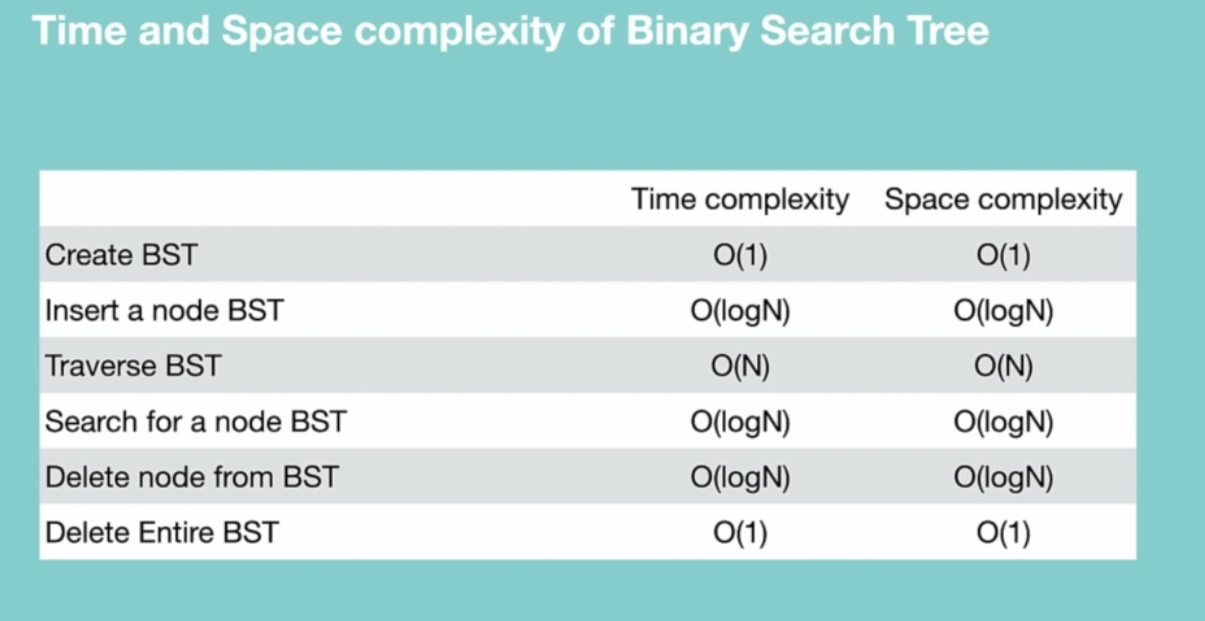

In [508]:
from IPython.display import Image
Image(filename="timeandspace.PNG")